In [3]:
# First download data (Github allows file size < 25Mb)

!svn co  https://github.com/chenyk1990/mldata/trunk/eq/signalnoise ./signalnoise

A    signalnoise/noise2082-1.npy
A    signalnoise/noise2082-10.npy
A    signalnoise/noise2082-11.npy
A    signalnoise/noise2082-12.npy
A    signalnoise/noise2082-13.npy
A    signalnoise/noise2082-14.npy
A    signalnoise/noise2082-2.npy
A    signalnoise/noise2082-3.npy
A    signalnoise/noise2082-4.npy
A    signalnoise/noise2082-5.npy
A    signalnoise/noise2082-6.npy
A    signalnoise/noise2082-7.npy
A    signalnoise/noise2082-8.npy
A    signalnoise/noise2082-9.npy
A    signalnoise/signal100-1.npy
A    signalnoise/signal100-10.npy
A    signalnoise/signal100-11.npy
A    signalnoise/signal100-12.npy
A    signalnoise/signal100-13.npy
A    signalnoise/signal100-14.npy
A    signalnoise/signal100-2.npy
A    signalnoise/signal100-3.npy
A    signalnoise/signal100-4.npy
A    signalnoise/signal100-5.npy
A    signalnoise/signal100-6.npy
A    signalnoise/signal100-7.npy
A    signalnoise/signal100-8.npy
A    signalnoise/signal100-9.npy
Checked out revision 50.


In [4]:
!ls signalnoise/

noise2082-1.npy  noise2082-3.npy  signal100-1.npy  signal100-3.npy
noise2082-10.npy noise2082-4.npy  signal100-10.npy signal100-4.npy
noise2082-11.npy noise2082-5.npy  signal100-11.npy signal100-5.npy
noise2082-12.npy noise2082-6.npy  signal100-12.npy signal100-6.npy
noise2082-13.npy noise2082-7.npy  signal100-13.npy signal100-7.npy
noise2082-14.npy noise2082-8.npy  signal100-14.npy signal100-8.npy
noise2082-2.npy  noise2082-9.npy  signal100-2.npy  signal100-9.npy


In [5]:
import glob
import numpy as np

In [13]:
## Here we load the signal and noise samples
# Noise is manually picked by YKC, this is only a small portion of the whole dataset of TXED 
# Signal is segmented according to analysts' picks in the TexNet catalog

noise=glob.glob("signalnoise/noise*.npy") #this is a file list
noise=[np.load(ii) for ii in noise]       #this is list of numpy array
noise=np.concatenate(noise,axis=2)        #this is a numpy array

signal=glob.glob("signalnoise/signal*.npy") #this is a file list
signal=[np.load(ii) for ii in signal]       #this is list of numpy array
signal=np.concatenate(signal,axis=2)        #this is a numpy array

print(noise.shape)
print(signal.shape)

(6000, 3, 2082)
(6000, 3, 2082)


In [24]:
#Let's plot some sample waveforms
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
def plot(datan,no,mode,figdir='./'):
	'''
	datan: numpy array of signal/noise
	no: number of figures
	mode: in order or random
	'''
	import os
	if os.path.isdir(figdir) == False:  
		os.makedirs(figdir,exist_ok=True)
	data=[]
	if mode==1:
		n_total=datan.shape[2]
		np.random.seed(20212223);
		order=np.arange(n_total);
		np.random.shuffle(order)
		inds=order[0:no]
	
	for jj in range(no):
		if mode==0:
			ii=jj;
		elif mode==1:
			ii=inds[jj];
		else:
			ii=jj;
		data=datan[:,:,ii]
		print("noise %d/%d"%(jj+1,no))
		
		fig, ax = plt.subplots()
		ax.set_xticklabels([]);
		ax.set_yticklabels([]);
		ax1 = fig.add_subplot(311)		
		plt.plot(data[:,0], 'k',label='Z')
		legend_properties = {'weight':'bold'}		
		ymin, ymax = ax1.get_ylim()
		plt.legend(loc = 'upper right', borderaxespad=0., prop=legend_properties)				
		plt.ylabel('Amplitude', fontsize=12) 
		ax1.set_xticklabels([])
		ax = fig.add_subplot(312)				 
		plt.plot(data[:,1], 'k',label='N')
		legend_properties = {'weight':'bold'}		
		ymin, ymax = ax.get_ylim()
		plt.legend(loc = 'upper right', borderaxespad=0., prop=legend_properties)				
		plt.ylabel('Amplitude', fontsize=12) 
		ax.set_xticklabels([])

		ax = fig.add_subplot(313)				 
		plt.plot(data[:,2], 'k',label='E')
		legend_properties = {'weight':'bold'}		
		ymin, ymax = ax.get_ylim()
		plt.legend(loc = 'upper right', borderaxespad=0., prop=legend_properties)				
		plt.ylabel('Amplitude', fontsize=12) 

		ax1.set_title('Waveform #%d'%ii, fontsize=14)

# 		plt.savefig(fname='/noise-'+str(jj)+'.png', format="png")
# 		plt.close() 

noise 1/10
noise 2/10
noise 3/10
noise 4/10
noise 5/10
noise 6/10
noise 7/10
noise 8/10
noise 9/10
noise 10/10


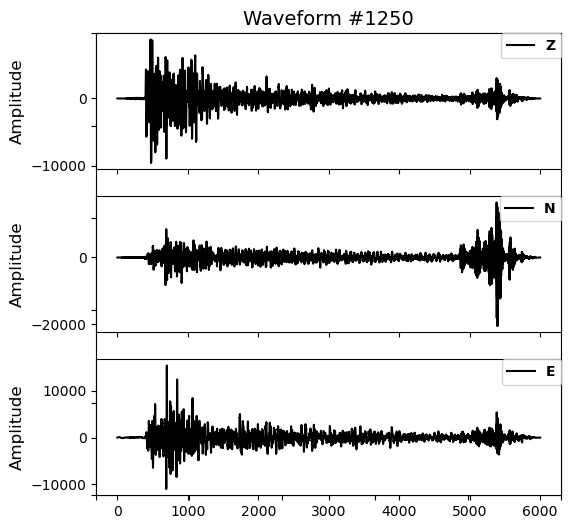

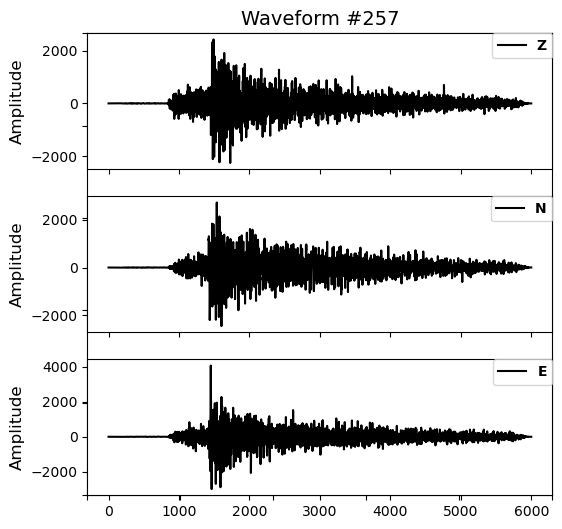

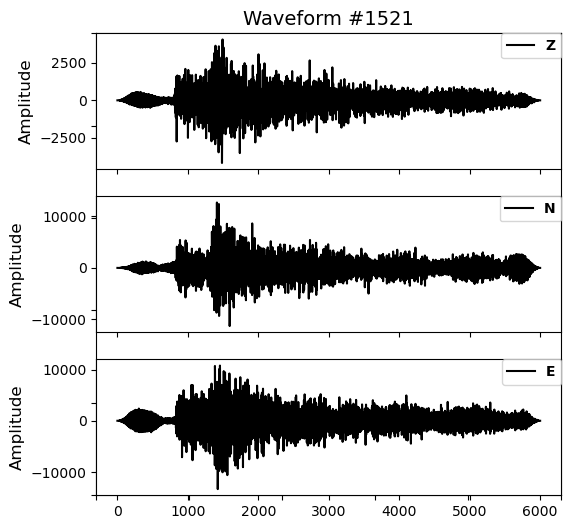

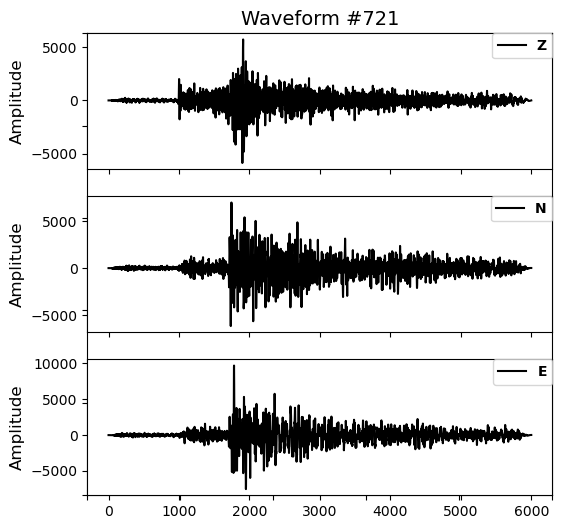

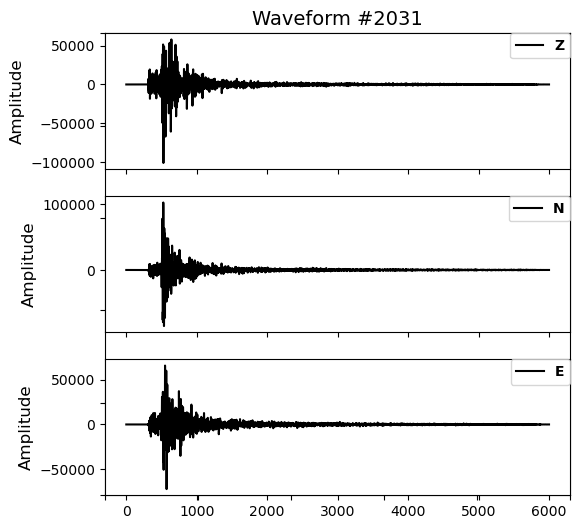

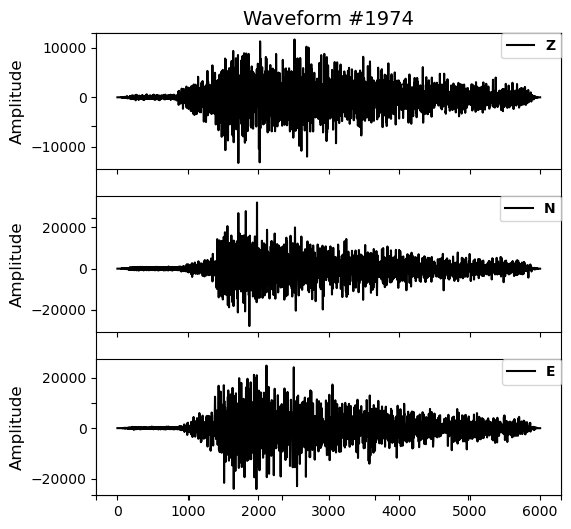

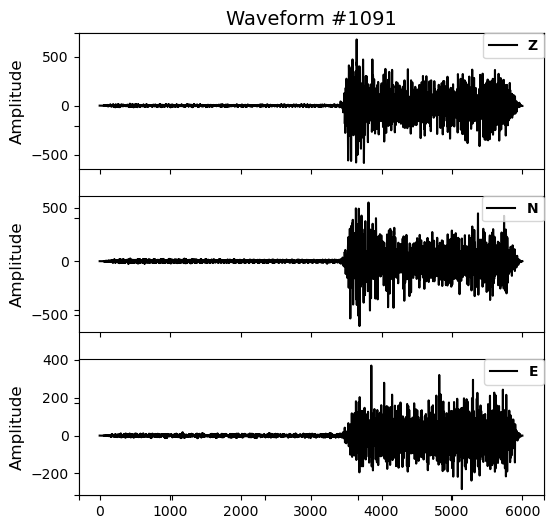

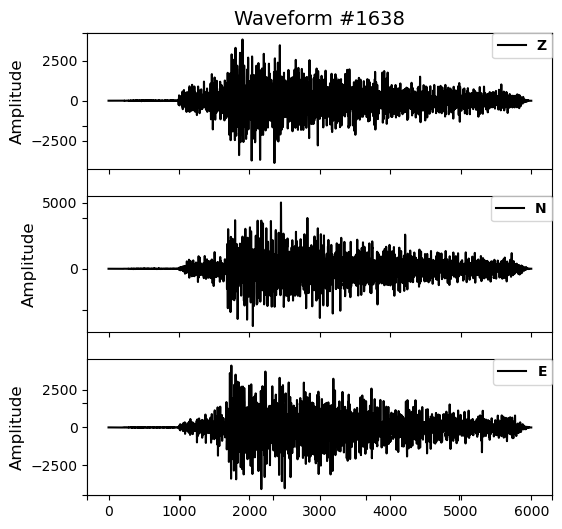

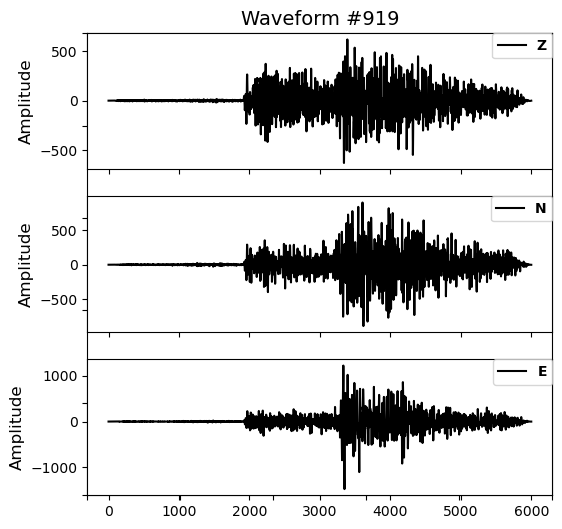

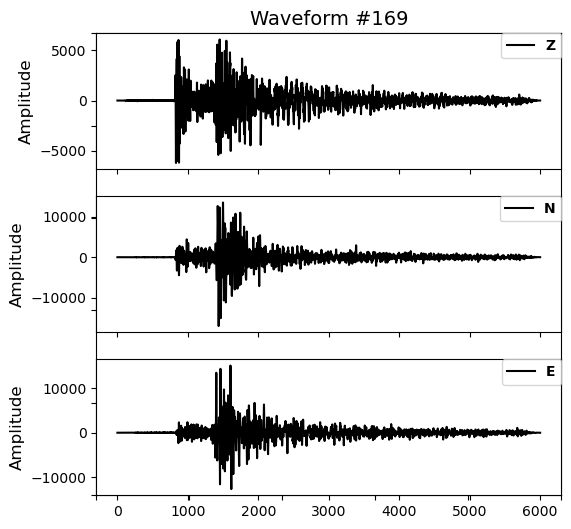

In [25]:
plot(signal,10,1,'./signal/')

noise 1/10
noise 2/10
noise 3/10
noise 4/10
noise 5/10
noise 6/10
noise 7/10
noise 8/10
noise 9/10
noise 10/10


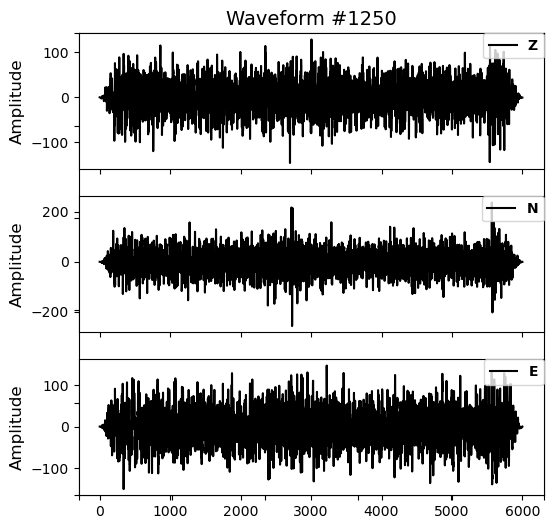

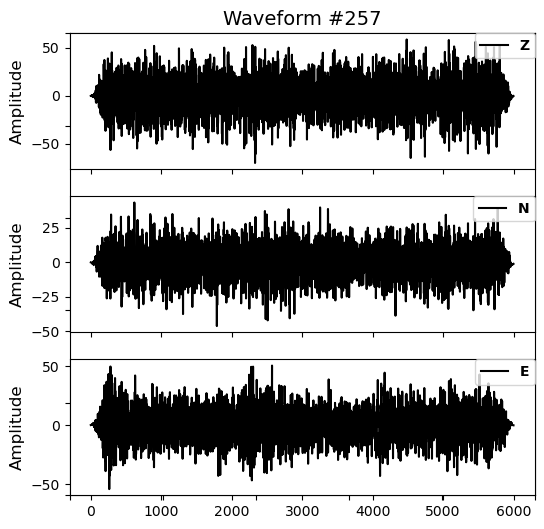

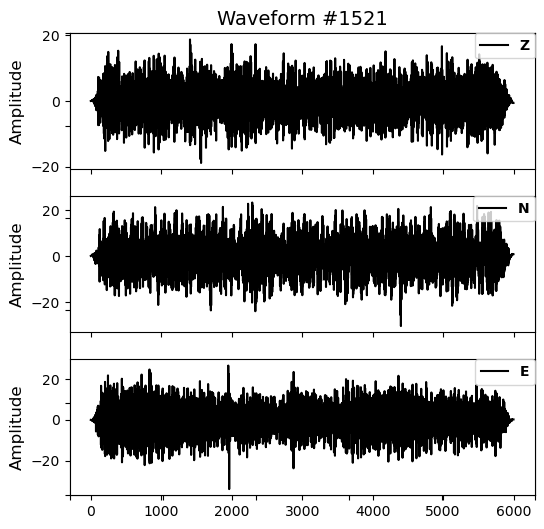

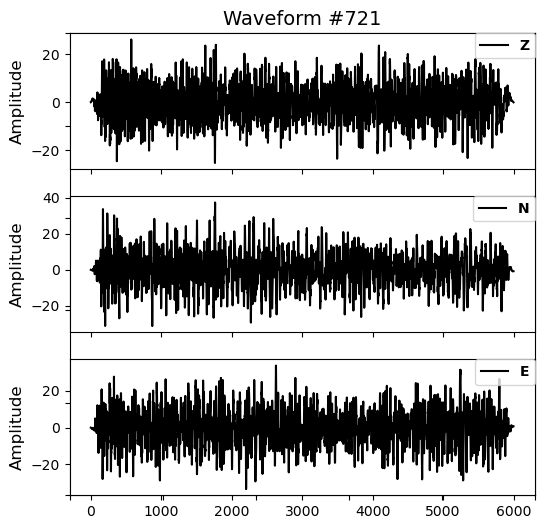

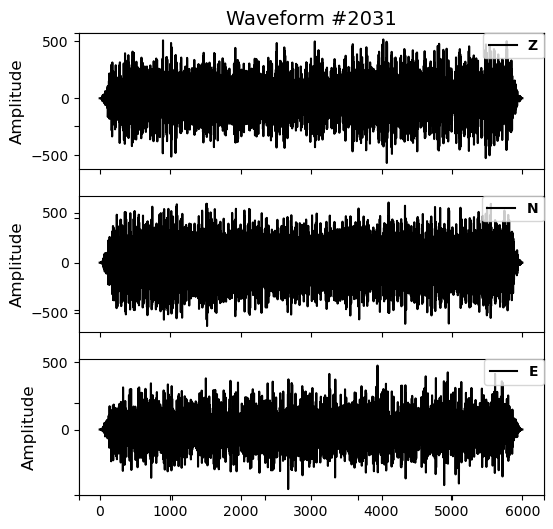

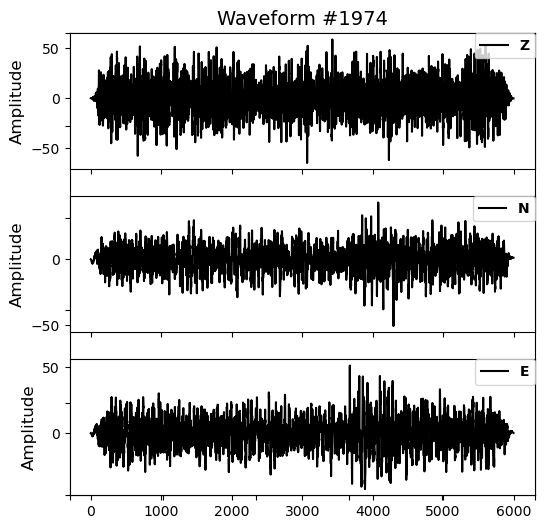

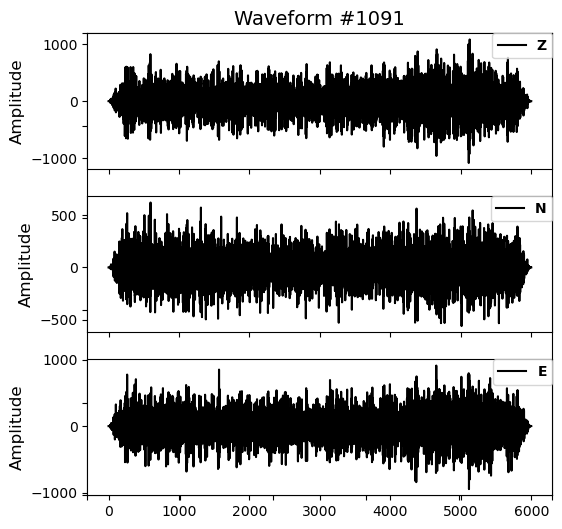

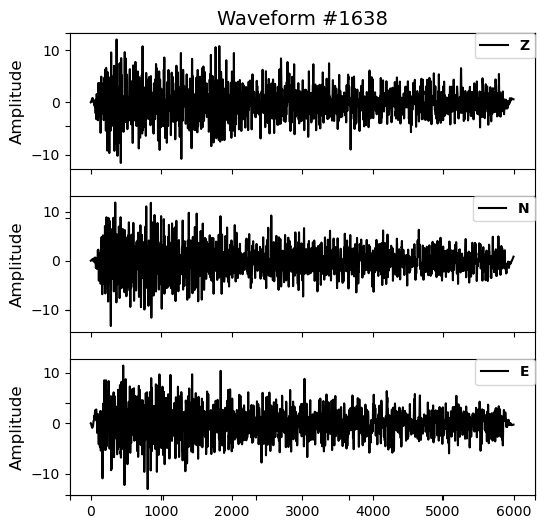

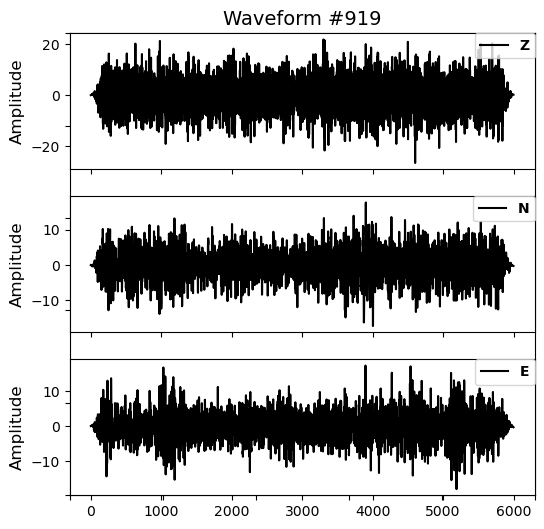

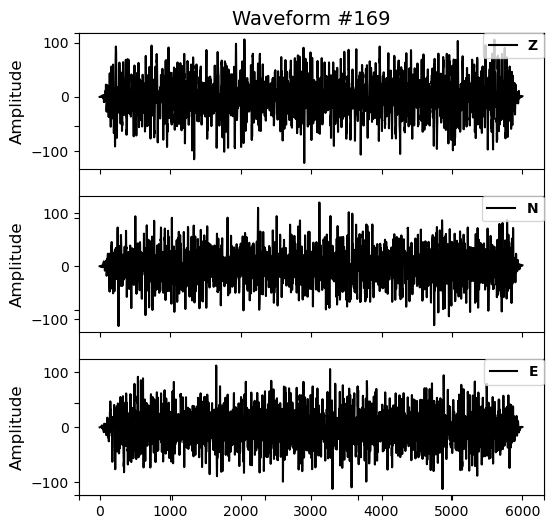

In [26]:
plot(noise,10,1,'./noise/')

In [27]:
# Now we will do DL
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers import Reshape
from keras.layers import GlobalAveragePooling1D


from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import concatenate

signal1=np.swapaxes(np.swapaxes(signal,0,2),1,2)
noise1=np.swapaxes(np.swapaxes(noise,0,2),1,2)
labels=np.ones([signal1.shape[0],1])
labeln=np.zeros([noise1.shape[0],1])

data=np.concatenate([signal1,noise1],axis=0)
label=np.concatenate([labels,labeln],axis=0)
label = to_categorical(label)

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, input_shape=(6000, 3)))
model.add(MaxPooling1D(pool_size=3 ))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,validation_data=([X_test],y_test), shuffle=True, batch_size=32)



2023-04-06 10:08:58.614465: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 10:09:07.949022: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5998, 16)          160       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1999, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 31984)             0         
                                                                 
 dense (Dense)               (None, 1000)              31985000  
                                                                 
 dense_1 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 31,987,162
Trainable params: 31,987,162
Non-trainable params: 0
____________________________________________